In [1]:
import osmnx as ox

ModuleNotFoundError: No module named 'osmnx'

In [2]:
import pandas as pd
import numpy as np

Create dataframe of possible Customers and Depot with lat and long

In [3]:
data = {"name": ["Depot",
                "Willibald Steinberg",
                "Janin Neureuther",
                "Elenore Stiebitz",
                "Edmund Schuchhardt",
                "Wendelin Reising",
                "Miodrag Steinberg",
                "Korinna Naser",
                "Karolin Müller",
                "Ilona Plath",
                "Korinna Dehmel",
                "Hardy Ehlert",
                "Gisela Dobes",
                "Adelinde Junitz",
                "Ayse Bruder",
                "Iwan Hettner",
                "Magret Wende",
                "Franziska Klemt",
                "Stilla Scholtz",
                "Urs Häring",
                "Alessandro Zorbach",
                "Heiner Meyer",
                "Hans-Willi Mangold",
                "Bruno Lübs",
                "Gaby Koch",
                "Bianka Carsten",
                "Silvio Pohl",
                "Hilmar Weimer"],
        "lat":[49.794783,
                49.81613668,
                49.78379436,
                49.74101263,
                49.78981985,
                49.79961774,
                49.75060158,
                49.79996773,
                49.76905279,
                49.8024249,
                49.72557488,
                49.74063439,
                49.77527529,
                49.79344148,
                49.72542982,
                49.73441099,
                49.7842105,
                49.76367319,
                49.80860352,
                49.74140135,
                49.79006487,
                49.7949711,
                49.80523587,
                49.81044205,
                49.77125288,
                49.80235161,
                49.787411,
                49.72032281],
       "long": [ 9.906499,
               9.897654496,
                9.896245726,
                9.88898842,
                9.964805881,
                9.873297251,
                9.919076627,
                9.889586523,
                9.913514194,
                9.906702006,
                9.871013167,
                9.894309675,
                9.976744862,
                9.995600981,
                9.913011043,
                9.911685357,
                9.981830362,
                9.891434637,
                9.98509193,
                9.866121715,
                9.868400064,
                9.954711196,
                9.953268058,
                9.986918606,
                9.896911684,
                9.972152744,
                9.971992508,
                9.922956133]}

In [4]:
DF = pd.DataFrame(data, columns = ["name", "lat", "long"])

DF

,name,lat,long
0,Depot,49.794783,9.906499
1,Willibald Steinberg,49.816137,9.897654
2,Janin Neureuther,49.783794,9.896246
3,Elenore Stiebitz,49.741013,9.888988
4,Edmund Schuchhardt,49.789820,9.964806
5,Wendelin Reising,49.799618,9.873297
6,Miodrag Steinberg,49.750602,9.919077
7,Korinna Naser,49.799968,9.889587
8,Karolin Müller,49.769053,9.913514
9,Ilona Plath,49.802425,9.906702


In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Text(49.794783, 9.91, 'Depot')

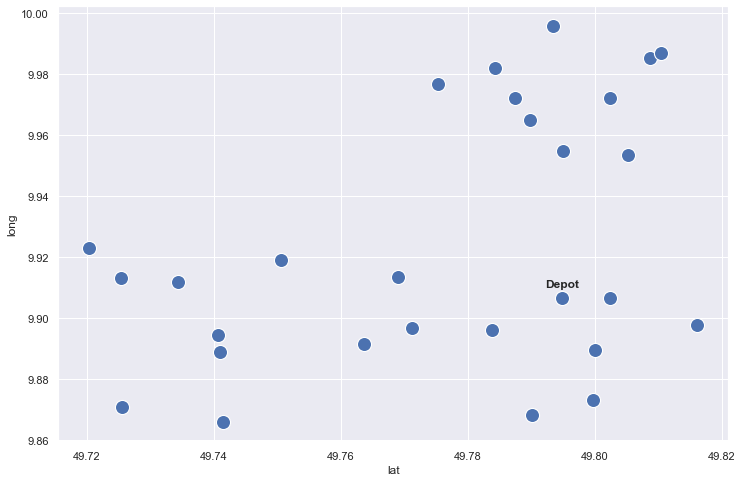

In [7]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set(style="darkgrid")
sns.scatterplot(data=DF, x="lat", y = "long", s=200)
plt.text(49.794783,9.91,"Depot", weight="bold", fontsize=12, ha="center")


In [7]:
##Create dataframe with Depot at index 0
df_neww = DF.sample(n=5, random_state = 1)
df_neww.loc[0.5] = "Depot",49.794783,9.906499
df_neww = df_neww.sort_index().reset_index(drop=True)
df_neww

,name,lat,long
0,Depot,49.794783,9.906499
1,Ayse Bruder,49.725430,9.913011
2,Franziska Klemt,49.763673,9.891435
3,Urs Häring,49.741401,9.866122
4,Alessandro Zorbach,49.790065,9.868400
5,Gaby Koch,49.771253,9.896912


Text(49.794783, 9.909, 'Depot')

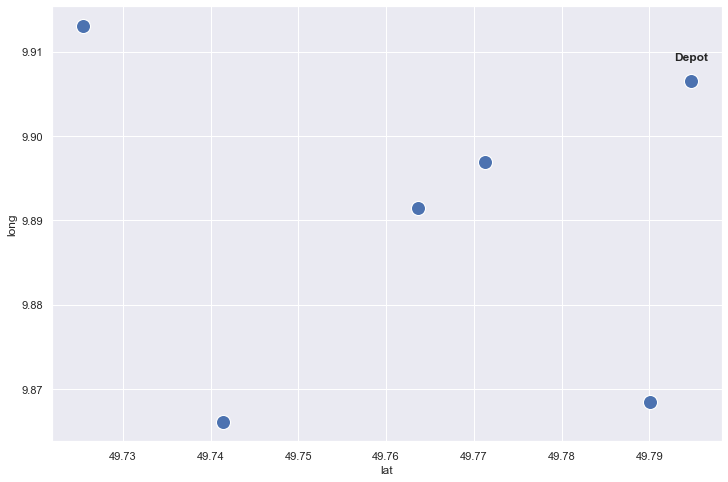

In [9]:
## Plot the Nodes and Depot
plt.rcParams["figure.figsize"] = [12,8]
sns.set(style="darkgrid")
sns.scatterplot(data=df_neww, x="lat", y = "long", s=200)
plt.text(49.794783,9.909,"Depot", weight="bold", fontsize=12, ha="center")

Convert to radians

In [10]:
df_neww['lat'] = np.radians(df_neww['lat'])
df_neww['long'] = np.radians(df_neww['long'])
df_neww

,name,lat,long
0,Depot,0.869083,0.172901
1,Ayse Bruder,0.867872,0.173015
2,Franziska Klemt,0.868540,0.172638
3,Urs Häring,0.868151,0.172196
4,Alessandro Zorbach,0.869001,0.172236
5,Gaby Koch,0.868672,0.172734


Import distancemetric to get a pairwise distance matrix

Convert radians to a numpy array

In [11]:
from sklearn.neighbors import DistanceMetric
from math import radians

In [12]:
dist = DistanceMetric.get_metric("haversine")

In [13]:
df_neww[["lat", "long"]].to_numpy()

array([[0.86908291, 0.17290102],
       [0.86787247, 0.17301468],
       [0.86853995, 0.1726381 ],
       [0.86815123, 0.17219631],
       [0.86900057, 0.17223607],
       [0.86867224, 0.17273369]])

Create new DF - use dist.pairwise function to get a distance matrix. Multiply the radians with 6373 to get km distances

In [124]:
pd.DataFrame(dist.pairwise(df_neww[["lat", "long"]].to_numpy())*6373, columns=df_neww.name.unique(), index=df_neww.name.unique())

,Depot,Ayse Bruder,Franziska Klemt,Urs Häring,Alessandro Zorbach,Gaby Koch
Depot,0.000000,7.728321,3.625557,6.608320,2.785590,2.706310
Ayse Bruder,7.728321,0.000000,4.527685,3.810469,7.871631,5.226578
Franziska Klemt,3.625557,4.527685,0.000000,3.073452,3.369704,0.930391
Urs Häring,6.608320,3.810469,3.073452,0.000000,5.415310,3.990016
Alessandro Zorbach,2.785590,7.871631,3.369704,5.415310,0.000000,2.927762
Gaby Koch,2.706310,5.226578,0.930391,3.990016,2.927762,0.000000


Do the same in meters

In [14]:
pd.DataFrame(dist.pairwise(df_neww[["lat", "long"]].to_numpy())*6378100, columns=df_neww.name.unique(), index=df_neww.name.unique())

,Depot,Ayse Bruder,Franziska Klemt,Urs Häring,Alessandro Zorbach,Gaby Koch
Depot,0.000000,7734.505111,3628.458325,6613.608484,2787.819550,2708.475371
Ayse Bruder,7734.505111,0.000000,4531.307915,3813.518424,7877.929864,5230.760575
Franziska Klemt,3628.458325,4531.307915,0.000000,3075.911574,3372.400146,931.135078
Urs Häring,6613.608484,3813.518424,3075.911574,0.000000,5419.643272,3993.209213
Alessandro Zorbach,2787.819550,7877.929864,3372.400146,5419.643272,0.000000,2930.104799
Gaby Koch,2708.475371,5230.760575,931.135078,3993.209213,2930.104799,0.000000


Start to implement a VRP with OR-Tools

In [8]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [127]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
            0.000000,7734.505111,3628.458325,6613.608484,2787.819550,2708.475371
        ],
        [
            7734.505111,0.000000,4531.307915,3813.518424,7877.929864,5230.760575
        ],
        [
            3628.458325,4531.307915,0.000000,3075.911574,3372.400146,931.135078
        ],
        [
            6613.608484,3813.518424,3075.911574,0.000000,5419.643272,3993.209213 
        ],
        [
            2787.819550,7877.929864,3372.400146,5419.643272,0.000000,2930.104799 
        ],
        [
            2708.475371,5230.760575,931.135078,3993.209213,2930.104799,0.000000 
        ],
        
    ]
    data['num_vehicles'] = 1
    data['depot'] = 0
    data["num_locations"] = 6
    return data

In [128]:
data = create_data_model()
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                   data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

In [129]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

In [130]:
dimension_name = 'Distance'
routing.AddDimension(
    transit_callback_index,
    0,  # no slack
    3000,  # vehicle maximum travel distance
    True,  # start cumul to zero
    dimension_name)
distance_dimension = routing.GetDimensionOrDie(dimension_name)
distance_dimension.SetGlobalSpanCostCoefficient(100)

In [131]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))





In [132]:
def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found !')


if __name__ == '__main__':
    main()

Objective: 20189
Route for vehicle 0:
 0 ->  5 ->  2 ->  1 ->  3 ->  4 -> 0
Distance of the route: 20189m

Maximum of the route distances: 20189m


solution is accurate (checked manually)

Now add capacity constraints

In [133]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
           0.000000,7734.505111,3628.458325,6613.608484,2787.819550,2708.475371
        ],
        [
            7734.505111,0.000000,4531.307915,3813.518424,7877.929864,5230.760575
        ],
        [
            3628.458325,4531.307915,0.000000,3075.911574,3372.400146,931.135078
        ],
        [
            6613.608484,3813.518424,3075.911574,0.000000,5419.643272,3993.209213 
        ],
        [
            2787.819550,7877.929864,3372.400146,5419.643272,0.000000,2930.104799 
        ],
        [
            2708.475371,5230.760575,931.135078,3993.209213,2930.104799,0.000000 
        ],
        
    ]
    data["demands"] = [0, 4, 8, 1, 1, 6]
    data["vehicle_capacities"] = [15, 15]
    data['num_vehicles'] = 2
    data['depot'] = 0
    data["num_locations"] = 6
    return data

In [134]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))


In [136]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data['demands'][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(
        demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data['vehicle_capacities'],  # vehicle maximum capacities
        True,  # start cumul to zero
        'Capacity')

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == '__main__':
    main()

Objective: 25594
Route for vehicle 0:
 0 Load(0) ->  4 Load(1) ->  3 Load(2) ->  1 Load(6) ->  2 Load(14) ->  0 Load(14)
Distance of the route: 20178m
Load of the route: 14

Route for vehicle 1:
 0 Load(0) ->  5 Load(6) ->  0 Load(6)
Distance of the route: 5416m
Load of the route: 6

Total distance of all routes: 25594m
Total load of all routes: 20
